# Validación

## Carga del set de datos de entrenamiento

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import roc_auc_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## Carga del set de datos de validación

In [73]:
df_validation = pd.read_csv("../data/validation/datos_hack_PCa_validacion.csv", index_col=0)

df_validation

,RPS28,IPO13,FAM86FP,CDT1,CCNE2,BORCS5,SNIP1,COL17A1,BCL6B,ATP13A4,...,MIRLET7A1,SNORD114.13,MIR335,MIR663B,MIR320C1,LINC00293,LINC00173,cohorte,relapse,grado_histologico
CM.1.0005.1,20.8571,5.0715,3.8431,3.5988,3.4485,3.8451,4.9182,4.8287,3.9327,3.7149,...,0.0000,-12.3631,0.0000,-161.0483,3.4690,3.6857,3.9144,cohorte_0,1,2
CM.1.0006.1,53.6877,5.3095,4.2900,3.6664,3.3918,4.1376,5.4601,5.1355,4.4685,3.6722,...,0.0000,-12.3631,0.0000,659.6885,3.4690,3.6857,4.3838,cohorte_0,1,2
CM.1.0013.1,7.9424,4.8338,3.7180,3.5839,3.3918,3.8055,4.4681,4.0054,3.9188,3.6722,...,0.0000,-12.3631,0.0000,570.1494,3.4690,3.6857,3.6505,cohorte_0,1,2
CM.1.0028.1,16.4530,5.0853,3.9763,3.7145,3.4412,4.3570,4.9032,4.7148,4.3221,3.6722,...,0.0000,-12.3631,0.0000,203.2636,3.4690,3.6857,3.9605,cohorte_0,0,2
CM.4.0011,12.0095,4.8392,3.8929,3.6462,3.5336,3.6955,4.8424,3.9102,4.2105,3.6920,...,0.0000,-12.3631,0.0000,-161.0483,64.0340,3.6857,3.9084,cohorte_0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1817981,28.4681,4.8673,4.0244,3.5664,3.6820,4.3341,5.2308,3.6812,3.9768,3.8143,...,5.8678,31.0864,5.8192,280.4802,3.9404,3.8186,3.6755,cohorte_9,0,2
GSM1817983,34.1502,4.9844,4.2104,4.0624,3.6025,3.8201,4.8284,4.2101,4.0294,3.7350,...,5.9472,31.3900,6.0542,280.3591,4.1311,3.5904,3.8905,cohorte_9,1,3
GSM1817986,31.1890,4.7422,4.0185,3.7580,3.5793,4.5618,4.5209,3.9605,4.0002,3.6655,...,5.9886,30.8729,5.9135,281.0646,3.9405,3.6647,3.7839,cohorte_9,1,3
GSM1817994,27.7633,4.8147,4.4091,3.6995,3.5381,3.7165,5.0856,4.1185,4.0025,3.6087,...,6.0655,30.1659,6.0264,279.1244,3.8658,3.5771,4.1249,cohorte_9,0,2


## Feature selection

In [74]:
features = pd.read_csv("../data/interim/feature_selection/expr_top100_genes.csv", index_col=0).columns
features

Index(['MMP11', 'IL6ST', 'UBE2C', 'CBX2', 'TOP2A', 'TYMS', 'CDC20', 'KIF20A',
       'ATAD1', 'CDCA5',
       ...
       'ARMCX4', 'BIN1', 'RIPK1', 'DNAJC21', 'ST6GAL1', 'CCPG1', 'MAFF',
       'relapse', 'grado_histologico', 'cohorte'],
      dtype='object', length=103)

In [75]:
df_validation = df_validation[features].copy()

In [76]:
df_validation.drop(columns=["cohorte"], inplace=True)

y_val = df_validation["relapse"].copy()
X_val = df_validation.drop(columns=["relapse"]).copy()

In [77]:
y_val

CM.1.0005.1    1
CM.1.0006.1    1
CM.1.0013.1    1
CM.1.0028.1    0
CM.4.0011      1
              ..
GSM1817981     0
GSM1817983     1
GSM1817986     1
GSM1817994     0
GSM1817997     0
Name: relapse, Length: 62, dtype: int64

In [78]:
X_val

,MMP11,IL6ST,UBE2C,CBX2,TOP2A,TYMS,CDC20,KIF20A,ATAD1,CDCA5,...,AOX1,TYW1,ARMCX4,BIN1,RIPK1,DNAJC21,ST6GAL1,CCPG1,MAFF,grado_histologico
CM.1.0005.1,4.3061,7.5768,4.3876,3.9081,4.4579,4.6182,4.9544,4.1954,4.8233,4.5244,...,4.4423,4.8987,3.9494,5.9718,5.1636,4.4219,7.6273,5.8640,5.5977,2
CM.1.0006.1,4.0723,8.7816,4.6577,3.8231,4.3046,4.4392,4.1837,4.0495,5.4134,4.3156,...,4.3727,5.3137,4.0525,6.0596,5.8165,4.5426,12.7507,7.3862,6.7240,2
CM.1.0013.1,4.3042,4.0121,4.2035,4.3076,4.3772,4.2399,4.4012,3.9231,4.4048,4.1968,...,3.9592,4.4396,3.6923,5.2375,4.6086,4.1395,5.4927,5.1656,3.5850,2
CM.1.0028.1,3.9198,8.6179,4.8289,3.7779,4.2604,4.2334,4.2924,3.9168,4.9426,4.1289,...,4.9599,5.1679,4.5715,6.1603,5.7381,4.8390,7.9755,6.3732,5.8586,2
CM.4.0011,4.2017,9.9924,4.6015,3.8011,4.4141,4.3117,4.4510,3.9104,5.3536,4.1964,...,4.2772,4.5821,3.9692,5.9246,4.9334,4.5440,7.8525,6.7999,3.2949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1817981,3.6739,12.1127,4.1397,3.6106,4.1575,4.3513,3.9646,3.9080,7.0769,4.3673,...,4.6895,5.7326,4.8501,5.8292,5.2926,4.9867,8.2638,8.2970,8.4234,2
GSM1817983,4.2725,5.9500,4.8720,3.9062,4.3721,4.7747,4.7762,4.1981,5.4451,4.7558,...,4.0119,5.1837,3.7623,5.5395,5.0009,4.4697,7.3088,6.9339,9.6796,3
GSM1817986,4.2934,6.7341,3.9944,3.6549,4.0816,4.0723,4.1924,3.9311,4.7660,4.2141,...,3.6759,4.6253,4.2475,4.9059,5.1252,4.2110,5.6898,7.5966,7.0324,3
GSM1817994,3.8570,10.6157,4.1814,4.0589,4.3624,4.2930,4.3753,3.9535,5.6659,4.1871,...,4.5765,5.1790,5.3410,6.3487,5.7855,5.1016,9.3684,7.9765,6.3844,2


## Procesando columnas


In [79]:
preprocessor_numeric = joblib.load("../models/preprocessor/preprocessor_numeric.joblib")
preprocessor_cat = joblib.load("../models/preprocessor/preprocessor_cat.joblib")
ordinal_encoder = joblib.load("../models/preprocessor/ordinal_encoder.joblib")
preprocessor_ord = joblib.load("../models/preprocessor/preprocessor_ord.joblib")

### Gleason numerico

In [80]:
X_num = preprocessor_numeric.transform(X_val)

### Gleason categórico

#### One-hot

In [81]:
X_cat = preprocessor_cat.transform(X_val)

#### Ordinal

In [82]:
X_val_ord = X_val.copy()

X_val_ord["grado_histologico"] = ordinal_encoder.transform(X_val[["grado_histologico"]])

X_ord_scaled = preprocessor_ord.transform(X_val_ord)

In [83]:
model_files = {
    "RandomForest": {
        "Numerico": "../models/rf_best_numerico.joblib",
        "Categorico": "../models/rf_best_categorico.joblib",
        "Ordinal": "../models/rf_best_ordinal.joblib",
    },
    "SVM": {
        "Numerico": "../models/svm_best_Numerico.joblib",
        "Categorico": "../models/svm_best_Categorico.joblib",
        "Ordinal": "../models/svm_best_Ordinal.joblib",
    },
    "GradientBoosting": {
        "Numerico": "../models/xgb_best_Numerico.joblib",
        "Categorico": "../models/xgb_best_Categorico.joblib",
        "Ordinal": "../models/xgb_best_Ordinal.joblib",
    },
    "MLP": {
        "Numerico": "../models/mlp_best_Numerico.joblib",
        "Categorico": "../models/mlp_best_Categorico.joblib",
        "Ordinal": "../models/mlp_best_Ordinal.joblib",
    }
}

sets_val = {
    "Numerico": X_num,
    "Categorico": X_cat,
    "Ordinal": X_ord_scaled
}

y_val_dict = {
    "Numerico": y_val,
    "Categorico": y_val,
    "Ordinal": y_val
}

In [86]:
all_results_val = []

for model_name, datasets in model_files.items():
    for dataset_name, file_path in datasets.items():
        model = joblib.load(file_path)
        X_eval = sets_val[dataset_name]
        y_eval = y_val_dict[dataset_name]

        y_pred = model.predict(X_eval)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_eval)[:, 1]
        else:
            y_prob = model.decision_function(X_eval)

        auc = roc_auc_score(y_eval, y_prob)
        f1 = f1_score(y_eval, y_pred)

        all_results_val.append({
            "Model": model_name,
            "Dataset": dataset_name,
            "AUC": auc,
            "F1": f1
        })

df_results_val = pd.DataFrame(all_results_val)
df_results_val

,Model,Dataset,AUC,F1
0,RandomForest,Numerico,0.969048,0.833333
1,RandomForest,Categorico,0.965476,0.800000
2,RandomForest,Ordinal,0.969048,0.833333
3,SVM,Numerico,0.883333,0.000000
4,SVM,Categorico,0.879762,0.000000
5,SVM,Ordinal,0.883333,0.000000
6,GradientBoosting,Numerico,0.964286,0.842105
7,GradientBoosting,Categorico,0.948810,0.769231
8,GradientBoosting,Ordinal,0.964286,0.842105
9,MLP,Numerico,0.917857,0.810811


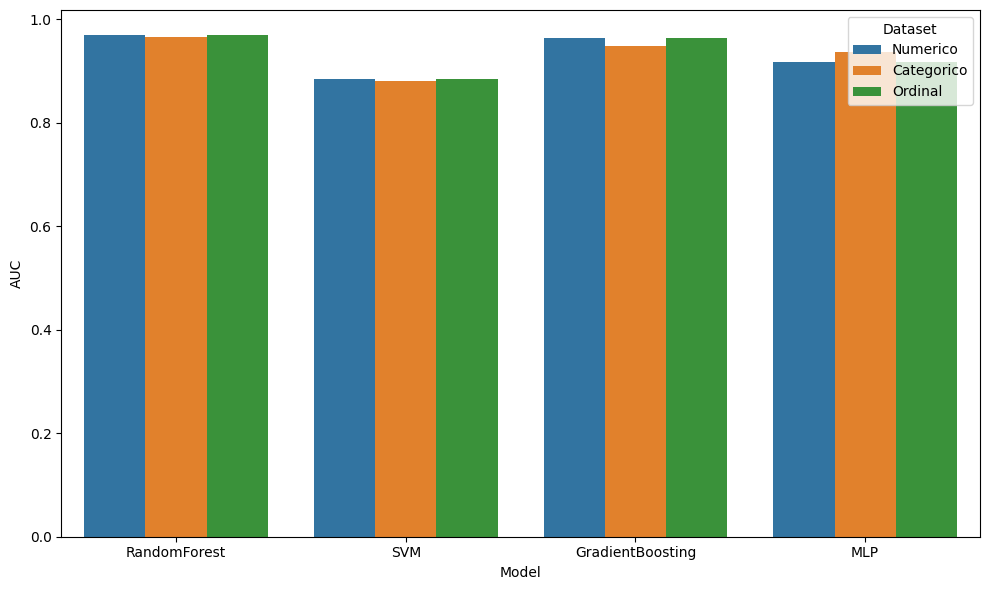

In [ ]:
plt.figure(figsize=(10,6))
plt.title("AUC Scores by Model and Dataset")
sns.barplot(data=df_results_val, x="Model", y="AUC", hue="Dataset")
plt.tight_layout()
plt.show()

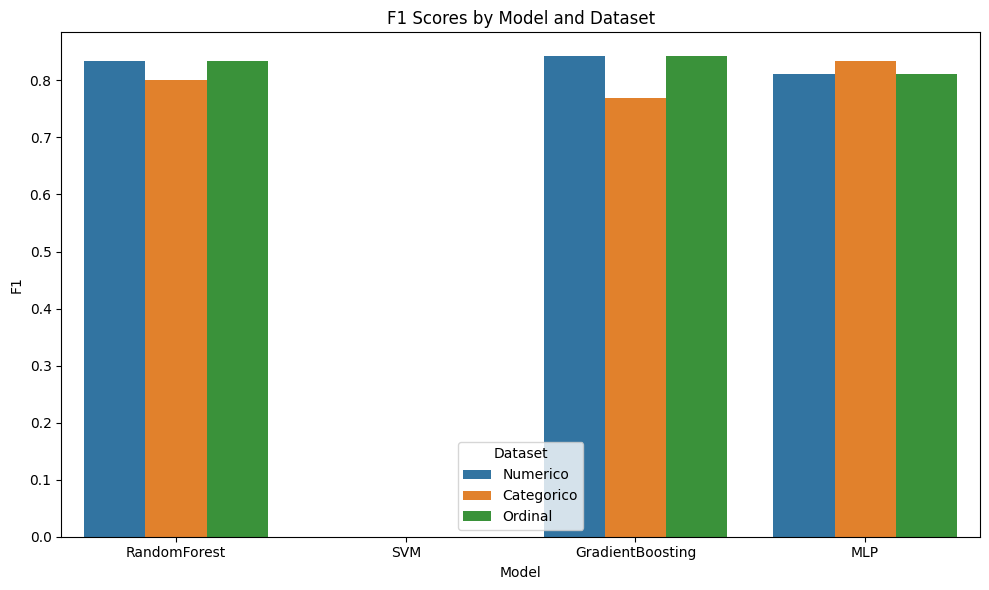

In [95]:
plt.figure(figsize=(10,6))
plt.title("F1 Scores by Model and Dataset")
sns.barplot(data=df_results_val, x="Model", y="F1", hue="Dataset")
plt.tight_layout()
plt.show()